# Q1:   Explain in brief, difference between Django, Pyramid and Flask

Django, Pyramid and Flask are python web frameworks used to build web applications. 

Dajango: it is majorly used to build larger applications and has more inbuild modules hence easy to build apps. 

Pyramid: It is smillar to Danjango except that devloper has flexiblity to select the right tool.

Flask: It is used for small applications with simpler requirements.


# Q2: If a list is nums=[0,1,2,3,4], what is nums[-1]?

In [1]:
# -value of index retuns the values from tail end
nums=[0,1,2,3,4]
nums[-1]

4

# Q3: Explain the output of the following piece of code

In [2]:
tuple=(123,'John')
tuple*=2
tuple

(123, 'John', 123, 'John')

1. Here name of variable used to create a tuple is an key word/ inbuilt funtion. 
2. create tuple is mutiplied by 2 ( which is equvilent to tuple = tuple*2)
3. Final tuple is printed 

# Q4:  Differentiate between the append() and extend() methods of a list with an example

### append() is used to add a element to existing list at the end 
### extend() is used to add a list or iterable to existing list at the end 

In [3]:
example_list =[] # Create a empty list

In [4]:
example_list.append(10) # append an int  to list
example_list.append('hello') # append an string to list
example_list

[10, 'hello']

In [5]:
example_list.extend(range(5)) # extending a iterable
example_list.extend(example_list) # extending a list
example_list

[10, 'hello', 0, 1, 2, 3, 4, 10, 'hello', 0, 1, 2, 3, 4]

# Q5:How do you remove the leading whitespace in a string? For example, leading whitespace in a string is the whitespace in a string before the first non-whitespace character. Eg.  '   Maersk'

## strip is function used to remove leading and trailing spaces 


In [6]:
given_string = ' Maersk'
given_string.strip()

'Maersk'

# Q6:  What is the enumerate () function in Python? Explain with an example.

####  enumerate is an inbuild function used to return the index of iterable or list.

In [7]:
# in this example lets try to get the index of vowels of list. 
import string
list_example = list(string.ascii_lowercase)
vowles = ['a', 'e', 'i', 'o', 'u']

# one way of doing is 

vowel_index = []
for i in range(len(list_example)):
    if list_example[i] in vowles:
        vowel_index.append(i)
print(vowel_index)


# using enumarate
vowel_index_en =[] 
for c, v in enumerate(list_example):
    if v in vowles:
        vowel_index_en.append(c)
print(vowel_index_en)


[0, 4, 8, 14, 20]
[0, 4, 8, 14, 20]


# Q7: Explain atleast three advantages of NumPy Array over the list in python.

#### numpy is used to store data of same dtype, where as list can store any dtype

Advatanges of numpy over list: 
   - Memory: numpy occupies lesser space than list
   - performance: calculation/evaluation if numpy takes lesser time than list
   - functions: numpy has various optimized funtions compared to list.

# Q8: List out all the possible differences between method and constructor in Python.

- Constructor: are special type of methods used to assign values to objects in its class
- Method is set of intructions / code that can be used at any point of program
- Constructor has no retrun values, Methods may or may not return value
- if no values are given to a function, constructor use to store  default values to avoid error. 

# Q9: Define generator and iterator with an example in Python. What is Monkey Patching?


# Q10: What will the output of the following code snippet: 

In [8]:
def squares(n):
    i=1
    while(i<=n):
        yield i**2
        i+=1
for i in squares(7):
    print(i)
# prints square of number from 1 to n:

1
4
9
16
25
36
49


# Embedded Theory Questions

In [9]:
1. How I/O devices are classified for embedded system?
2. What is the difference between Microprocessor and Microcontroller?
3. What is a Watchdog Timer?
4. What are common errors in Embedded system?
5. What is the need for an infinite loop sometimes in embedded systems?

Object `Microcontroller` not found.
Object `Timer` not found.
Object `systems` not found.


# Problem Statement 1
Define a ML technique that you would use for the fake news detection.
Build a Machine learning Model to detect the Fake new detection.
We could use online Jupyter Lab or similar environment to build, train and test the model
You could use your choice of dataset for the training and testing this model or any
dataset from https://www.kaggle.com/datasets?search=Fake+news
Based on the Test data set you should also be able to identify the accuracy of the Model

In [10]:
# For this task dataset from  "https://www.kaggle.com/anmolkumar/fake-news-content-detection?select=train.csv" is used.
# as the test cases labels are not known in the shared link, 
# train data only considered as overall data and is splited train and test 

In [12]:
# Import packages 
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from sklearn import preprocessing
import easygui as eg
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import naive_bayes
from sklearn.linear_model import logistic
from sklearn.tree import DecisionTreeClassifier
import xgboost
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Load data 
path = eg.fileopenbox()
df = pd.read_csv(path)
df.head()

,Labels,Text,Text_Tag
0,1,Says the Annies List political group supports ...,abortion
1,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments"
2,3,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy
3,1,Health care reform legislation is likely to ma...,health-care
4,2,The economic turnaround started at the end of ...,"economy,jobs"


# Attribute Description:
### Text - Raw content from social media/ new platforms
### Text_Tag - Different types of content tags (9 unique products)
### Labels - Represents various classes of Labels
- Half-True - 2
- False - 1
- Mostly-True - 3
- True - 5
- Barely-True - 0
- Not-Known - 4

In [14]:
# check if any null values in data | no Missing values in data
df.isnull().sum()

Labels      0
Text        0
Text_Tag    0
dtype: int64

Text(0, 0.5, 'Lable Count')

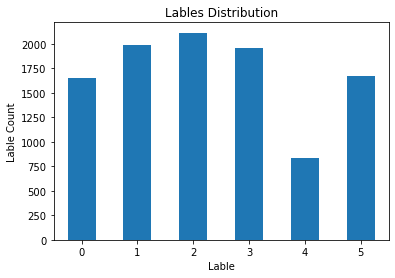

In [15]:
count_classes = pd.value_counts(df['Labels'], sort = False)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Lables Distribution")
plt.xlabel("Lable")
plt.ylabel("Lable Count")

In [16]:
# it is a balanced data

In [17]:
Text_TFIDF=TfidfVectorizer(use_idf=True,lowercase=True,strip_accents='ascii',stop_words='english', ngram_range=(1, 1))

In [18]:
y=df.Labels
x=Text_TFIDF.fit_transform(df.Text)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4,test_size=0.33)

In [20]:
print(x_train.shape)
print(y_test.shape)

(6859, 11912)
(3379,)


array([[ 29, 161, 251,  89,   0,  14],
       [ 33, 188, 278, 121,   0,  27],
       [ 31, 151, 360, 136,   0,  23],
       [ 18, 120, 306, 185,   0,  32],
       [ 20,  95, 123,  33,   0,   7],
       [ 20, 100, 256, 141,   0,  31]], dtype=int64)

              precision    recall  f1-score   support

           0       0.19      0.05      0.08       544
           1       0.23      0.29      0.26       647
           2       0.23      0.51      0.32       701
           3       0.26      0.28      0.27       661
           4       0.00      0.00      0.00       278
           5       0.23      0.06      0.09       548

    accuracy                           0.23      3379
   macro avg       0.19      0.20      0.17      3379
weighted avg       0.21      0.23      0.20      3379

Accuracy of model is 0.23


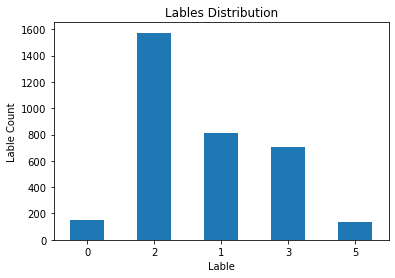

In [25]:
model=naive_bayes.MultinomialNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
count_classes = pd.value_counts(y_pred, sort = False)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Lables Distribution")
plt.xlabel("Lable")
plt.ylabel("Lable Count")
display(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy of model is', round(accuracy_score(y_test, y_pred),2))

array([[ 76, 174, 126,  86,  18,  64],
       [ 90, 221, 137, 100,  29,  70],
       [ 84, 160, 190, 149,  13, 105],
       [ 71, 140, 155, 184,  11, 100],
       [ 33, 101,  63,  35,  16,  30],
       [ 58, 138, 131, 122,   6,  93]], dtype=int64)

              precision    recall  f1-score   support

           0       0.18      0.14      0.16       544
           1       0.24      0.34      0.28       647
           2       0.24      0.27      0.25       701
           3       0.27      0.28      0.28       661
           4       0.17      0.06      0.09       278
           5       0.20      0.17      0.18       548

    accuracy                           0.23      3379
   macro avg       0.22      0.21      0.21      3379
weighted avg       0.22      0.23      0.22      3379

Accuracy of model is 0.23


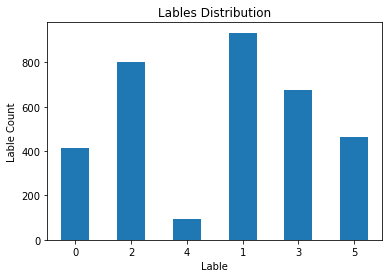

In [26]:
xgb=xgboost.XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
count_classes = pd.value_counts(y_pred, sort = False)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Lables Distribution")
plt.xlabel("Lable")
plt.ylabel("Lable Count")
display(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy of model is', round(accuracy_score(y_test, y_pred),2))

# Problem Statement 2
Create an Image Analytics script to detect License Number plate in the images.
You could use OpenCV or Libraries of your choice. The application should draw a bounding box around the
License plate and blur the license plate.
We could use online Jupyter Lab or similar environment to build this.
Hint: you could use OpenCV cascade Classifier for this exercise
https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_russian_plate_number.x
ml